# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

To make things easy when visualizing the traffic signs, let's first print the traffic sign names as well as some additional metrics about the dataset.

In [1]:
import numpy as np

from datasets.german_traffic_signs import GermanTrafficSignDataset

# NOTE I explain these two lines in greater details below
data = GermanTrafficSignDataset()
data.configure(one_hot=True, train_validate_split_percentage=0.15)

print(data)

 
One-Hot Encoded:             True
Train/Validation Split %:    0.15
 
Training size:               33327
Validation size:             5882
Testing size:                12630
Predicting size:             5
Total classes:               43
 
Training orig shape:         (33327, 32, 32, 3)
Training gray shape:         (33327, 32, 32)
Training flat shape:         (33327, 1024)
 
Validation orig shape:       (5882, 32, 32, 3)
Validation gray shape:       (5882, 32, 32)
Validation flat shape:       (5882, 1024)
 
Testing orig shape:          (12630, 32, 32, 3)
Testing gray shape:          (12630, 32, 32)
Testing flat shape:          (12630, 1024)
 
Predicting orig shape:       (5, 32, 32, 3)
Predicting gray shape:       (5, 32, 32)
Predicting flat shape:       (5, 1024)
 
Training label shape:        (33327, 43)
Validation flat label shape: (5882, 43)
Testing gray label shape:    (12630, 43)
 
Sign names:
 
  0 - Speed limit (20km/h)
  1 - Speed limit (30km/h)
  2 - Speed limit (50km/h)
  3

### Traffic Sign Visualizations

##### Training Set

Plotting training images 31782,33278,8648,20626,23625,2844,892,19075,15526,3583,30270,923,5489,15471,9782,29621,10272,386,24601,23324,15184,2279,4891,6560


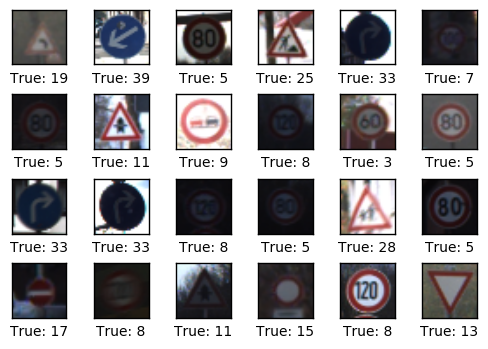

In [2]:
from plot.image_plotter import ImagePlotter

perm = np.arange(data.num_training)
np.random.shuffle(perm)

rows = 4
cols = 6
sample_size = rows*cols

sample_set = perm[:sample_size]
print('Plotting training images {}'.format(','.join(map(str, sample_set))))
ImagePlotter.plot_images(
    images=data.train_orig[perm[:sample_size]], 
    labels=[np.argmax(label) for label in data.train_labels[perm[:sample_size]]], 
    rows=rows, columns=cols)

##### Validation Set

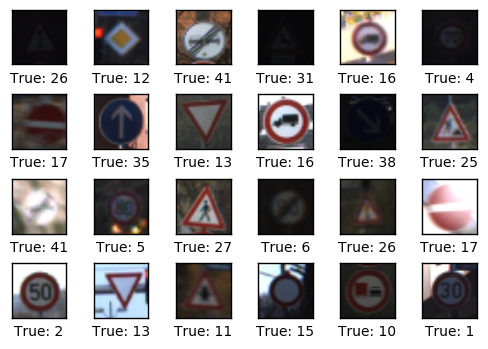

In [3]:
from plot.image_plotter import ImagePlotter

perm = np.arange(data.num_validation)
np.random.shuffle(perm)
rows = 4
cols = 6
sample_size = rows*cols
ImagePlotter.plot_images(
    images=data.validate_orig[perm[:sample_size]], 
    labels=[np.argmax(label) for label in data.validate_labels[perm[:sample_size]]], 
    rows=rows, columns=cols)

##### Testing Set

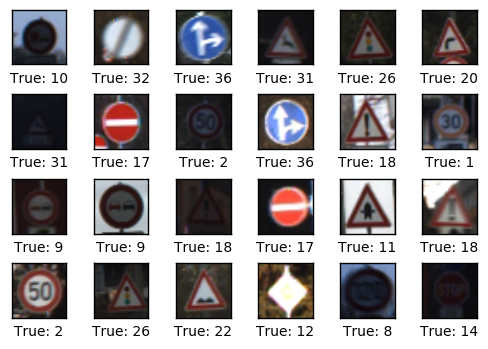

In [4]:
from plot.image_plotter import ImagePlotter

perm = np.arange(data.num_testing)
np.random.shuffle(perm)
rows = 4
cols = 6
sample_size = rows*cols
ImagePlotter.plot_images(
    images=data.test_orig[perm[:sample_size]], 
    labels=[np.argmax(label) for label in data.test_labels[perm[:sample_size]]], 
    rows=rows, columns=cols)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

### Dataset preparation

First, let's construct a fresh German Traffic Sign dataset. Nothing fancy goes on here but things are about to get awesome really quickly. Stay tuned!

```python
from datasets.german_traffic_signs import GermanTrafficSignDataset

data = GermanTrafficSignDataset()
```

Next, let's configure the dataset. We're going to ask it to set aside 20% of the training dataset for validation purposes when we're training our model. We're also going to ask it to One-Hot Encode the training, validation, test and prediction labels so we don't have to do any work later on.

>In code, you'll notice immediately some logs are printed informing us about what it's doing during the configuration process.

```python
# Configure the dataset
data.configure(one_hot=True, train_validate_split_percentage=0.20)
```

### GermanTrafficSignDataset Code Review

>I encourage you to take a look at the code that went into preprocessing the dataset for network training. Here are some links directly to the code in github, line for line.


###### #configure

[data.configure(one_hot=True, train_validate_split_percentage=0.20)](https://github.com/matthewzimmer/traffic-sign-classification/blob/2ff5553a8e730eb7ba0a2f28cdb6d406a498a933/datasets/german_traffic_signs.py#L49-L99 "data.configure(one_hot=True, train_validate_split_percentage=0.20)")



**NOTE:** The following methods are invoked by #configure in sequential order.

###### #__generate_prediction_dataset

_Reads in all images from the images/predictables directory and puts them into data/predict.p_

[data.__generate_prediction_dataset](https://github.com/matthewzimmer/traffic-sign-classification/blob/2ff5553a8e730eb7ba0a2f28cdb6d406a498a933/datasets/german_traffic_signs.py#L251-L283)

###### #__load_data

_Loads in train features and labels and test features and labels from their respective pickle file_

[data.__load_data](https://github.com/matthewzimmer/traffic-sign-classification/blob/2ff5553a8e730eb7ba0a2f28cdb6d406a498a933/datasets/german_traffic_signs.py#L285-L307 "data.__load_data")


###### #__split_train_and_validation

_Constructs randomized datasets for training and validation_

[data.__split_train_and_validation](https://github.com/matthewzimmer/traffic-sign-classification/blob/2ff5553a8e730eb7ba0a2f28cdb6d406a498a933/datasets/german_traffic_signs.py#L309-L322)


###### #__compute_metrics

[data.__compute_metrics](https://github.com/matthewzimmer/traffic-sign-classification/blob/2ff5553a8e730eb7ba0a2f28cdb6d406a498a933/datasets/german_traffic_signs.py#L324-L333)



###### #__prepare_images

_Prepares the images for training, validation, testing and visualization._

[data.__prepare_images](https://github.com/matthewzimmer/traffic-sign-classification/blob/2ff5553a8e730eb7ba0a2f28cdb6d406a498a933/datasets/german_traffic_signs.py#L335-L427)



###### #__one_hot_encode_labels

_When one-hot encoding is enabled, the train, validate and test labels are one-hot encoded using LabelBinarizer._

[data.__one_hot_encode_labels](https://github.com/matthewzimmer/traffic-sign-classification/blob/2ff5553a8e730eb7ba0a2f28cdb6d406a498a933/datasets/german_traffic_signs.py#L429-L457)

That was easy! Almost too easy, really. What's actually going on there?

Let's print the documentation for the GermanTrafficSignDataset#configure method to uncover the magic and reveal the tecniques I used to preprocess the data.

In [5]:
from IPython.display import Image, display
from IPython.core.display import HTML 
display(Image(url= "doc/GermanTrafficSignDataset_configure_docs.png"))

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

Inside of [data.__split_train_and_validation](https://github.com/matthewzimmer/traffic-sign-classification/blob/426c2467a1405ba6ba12c474ccd459f72d392c20/datasets/german_traffic_signs.py#L254-L267 "data.__split_train_and_validation") I leverage SKLearn's [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) convenience method. It's great because it automatically randomizes the validation set based on a predetermined percentage. I chose the traditional 80/20 split out of habit and felt that if I achieved a high accuracy with 80% of the training data, this should generalize well enough to the other 20% as well as the testing and prediction sets.

>**NOTE:** I'm using a fixed random_state number so my testing is relatively predictable and consistent across runs.

```python
def __split_train_and_validation(self):
    """
    Get randomized datasets for training and validation
    """

    self.train_orig, self.validate_orig, self.train_labels, self.validate_labels = train_test_split(
        self.train_orig,
        self.train_labels,
        test_size=self.split_size,
        random_state=832224)

    print('Training features and labels randomized and split with train_test_split (validation % of training set: {})'.format(self.split_size))
```

You can also see it in github [here](https://github.com/matthewzimmer/traffic-sign-classification/blob/7e241e3289a6792cb6ebf2ff051995cdbbd0bdae/datasets/german_traffic_signs.py#L254-L267 "here").

The second phase of splitting my data may be discovered inside of [data.__prepare_images](https://github.com/matthewzimmer/traffic-sign-classification/blob/7e241e3289a6792cb6ebf2ff051995cdbbd0bdae/datasets/german_traffic_signs.py#L278-L355). 

For convenience, here is the documentation for __prepare_images.

In [6]:
from IPython.display import Image, display
from IPython.core.display import HTML 
display(Image(url= "doc/GermanTrafficSignDataset___prepare_images_docs.png"))

Finally, let's print our instance of GermanTrafficSignDataset. It reveals a ton of information about the contents of the **data** variable such as the number and shape of items in each bucket and the traffic sign names corresponding to each label.

In [7]:
print(data)

 
One-Hot Encoded:             True
Train/Validation Split %:    0.15
 
Training size:               33327
Validation size:             5882
Testing size:                12630
Predicting size:             5
Total classes:               43
 
Training orig shape:         (33327, 32, 32, 3)
Training gray shape:         (33327, 32, 32)
Training flat shape:         (33327, 1024)
 
Validation orig shape:       (5882, 32, 32, 3)
Validation gray shape:       (5882, 32, 32)
Validation flat shape:       (5882, 1024)
 
Testing orig shape:          (12630, 32, 32, 3)
Testing gray shape:          (12630, 32, 32)
Testing flat shape:          (12630, 1024)
 
Predicting orig shape:       (5, 32, 32, 3)
Predicting gray shape:       (5, 32, 32)
Predicting flat shape:       (5, 1024)
 
Training label shape:        (33327, 43)
Validation flat label shape: (5882, 43)
Testing gray label shape:    (12630, 43)
 
Sign names:
 
  0 - Speed limit (20km/h)
  1 - Speed limit (30km/h)
  2 - Speed limit (50km/h)
  3

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

My final architecture is a simple three layer linear neural network with a single hidden layer. The hidden layer has 512 neurons because after a bit of research, it appears the rule-of-thumb baseline for hidden layer neurons is to calculate the mean of the intput and output nurons.

I built a simple framework allowing me to rapidly test various hyper parameters to obtain the most optimal model to yield the highest accuracy against photos I took myself.

Each implementation of BaseNeuralNetwork essentially needs to override two methods: *#fit* and *#predict*. I ultimately plan to build our a Convolutional Neural Network when I find time to do so.

### Single Layer Network Architecture Explained
##### Abstract

The very first network I put together was a simple three layer linear neural network with a single hidden layer with 512 neurons inspired by the first 
TensorFlow lab we did in class. It allowed me to familiarize myself with Python, Numpy, Matplotlib 
and TensorFlow.

I successfully achieved a **90.94% validation accuracy** with this network implementation from 20% of the training set data. In addition, **67%** (4 of 6) of the images I took myself were predicted accurately.

> **NOTE** I've never coded in Python, Numpy, Jupyter Notebook, TensorFlow or Matplotlib until now so it took me longer than desired to get this far but I am satisfied with my first attempt and I am more comfortable now than I was when I first started.

##### Model Training Walkthrough

Let's define our hyper parameters in advance. We will be feeding this into the network's configuration context later.

```python
from classifiers.linear.single_layer_linear import SingleLayerHyperParametersContext

hyper_parameters = SingleLayerHyperParametersContext(
    hidden_layer_neuron_count=512,
    start_learning_rate=0.2, 
    epochs=200, 
    batch_size=20, 
    required_accuracy_improvement=50
)
```

An instance of ConfigurationContext holds a reference to our GermanTrafficSignDataset instance variable and our SingleLayerHyperParametersContext instance variable.

>This object is required by all _BaseNeuralNetwork_ implementations. Otherwise training will not function.

```python
from classifiers.base_neural_network import ConfigurationContext

config_context = ConfigurationContext(data, hyper_parameters)
```

First thing's first, let's instantiate the SingleLayerLinear class.

```python
from classifiers.linear.single_layer_linear import SingleLayerLinear

simple_nn = SingleLayerLinear()```

Next, let's configure our network passing in our ConfigurationContext instance variable we instantiated above.

This is the principle entry point into all _BaseNeuralNetwork_ implementations. 

>**NOTE** The network will not function without a proper configuration context.

```python
simple_nn.configure(config_context)
```

To train the network, we call the generate method.

>**NOTE** *#configure* must be called first.

```python
simple_nn.generate()
```

##### Model Prediction Code Example

To predict against a previously trained network, we call the *BaseNueralNetwork#predict* method.

```python
from classifiers.linear.single_layer_linear import SingleLayerLinear
from datasets.german_traffic_signs import GermanTrafficSignDataset

# I put my images inside of GermanTrafficSignDataset so we need 
# inject the predict_flat images into #predict.
data = GermanTrafficSignDataset()
data.configure(one_hot=True)

simple_nn = SingleLayerLinear()
simple_nn.configure(ConfigurationContext(data, SingleLayerHyperParametersContext()))
simple_nn.predict(images=data.predict_flat, labels=data.predict_labels, model_name='SingleLayerLinear_38eb4c21-45f6-4695-a257-6f964ffef68f_best_validation_0.20S_0.2200LR_200E_32B')
```

##### SingleLayerLinear Class Definition

```python
import tensorflow as tf
import numpy as np
import math
import os

from classifiers.base_neural_network import BaseNeuralNetwork, HyperParametersContext


class SingleLayerHyperParametersContext(HyperParametersContext):
    def __init__(
            self,
            hidden_layer_neuron_count=512,
            **kwargs
    ):
        """

        :param hidden_layer_neuron_count: number of neurons for the hidden layer
        :param kwargs: Arguments to pass into to super constructor
        """
        super(SingleLayerHyperParametersContext, self).__init__(**kwargs)
        self.hidden_layer_neuron_count = hidden_layer_neuron_count


class SingleLayerLinear(BaseNeuralNetwork):
    def fit(self):
        data = self.config.data
        hyper_parameters = self.config.hyper_parameters

        image_size = data.train_flat.shape[1]
        num_classes = data.num_classes
        num_training = data.num_training

        # Passing global_step to minimize() will increment it at each step.
        global_step = tf.Variable(0, trainable=False)
        initial_learning_rate = hyper_parameters.start_learning_rate

        # decayed_learning_rate = learning_rate * decay_rate ^ (global_step / decay_steps)
        decayed_learning_rate = tf.train.exponential_decay(learning_rate=initial_learning_rate, global_step=global_step, decay_steps=75000, decay_rate=0.96, staircase=True)

        training_epochs = hyper_parameters.epochs
        batch_size = hyper_parameters.batch_size
        batch_count = int(math.ceil(num_training / batch_size))
        display_step = 1

        n_hidden_layer = hyper_parameters.hidden_layer_neuron_count

        # Store layers weight & bias
        weights = {
            'hidden_layer': tf.Variable(tf.random_normal([image_size, n_hidden_layer]), name='weights_hidden_layer'),
            'out': tf.Variable(tf.random_normal([n_hidden_layer, num_classes]), name='weights_out')
        }
        biases = {
            'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer]), name='biases_hidden_layer'),
            'out': tf.Variable(tf.random_normal([num_classes]), name='biases_out')
        }

        # tf Graph input
        features = tf.placeholder("float", [None, image_size])
        labels = tf.placeholder("float", [None, num_classes])

        # Feed dicts for training, validation, and test session
        train_feed_dict = {features: data.train_flat, labels: data.train_labels}
        valid_feed_dict = {features: data.validate_flat, labels: data.validate_labels}
        test_feed_dict = {features: data.test_flat, labels: data.test_labels}
        predict_feed_dict = {features: data.predict_flat, labels: data.predict_labels}

        # Hidden layer with RELU activation
        layer_1 = tf.add(tf.matmul(features, weights['hidden_layer']), biases['hidden_layer'])
        layer_1 = tf.nn.relu(layer_1)

        # Output layer with linear activation
        logits = tf.matmul(layer_1, weights['out']) + biases['out']

        # Define loss and optimizer
        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, labels))
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=decayed_learning_rate).minimize(cost,            global_step=global_step)

        init = tf.initialize_all_variables()

        with tf.Session() as sess:
            sess.run(init)

            for epoch in range(training_epochs):
                for i in range(batch_count):
                    x_batch, y_batch, batch_start, batch_end = data.next_batch(batch_size)
                    batch_feed_dict = {features: x_batch, labels: y_batch}

                    # Run optimization op (backprop) and cost op (to get loss value)
                    sess.run(optimizer, feed_dict=batch_feed_dict)

                # Display logs per epoch step and very last batch iteration
                if epoch % display_step == 0 or (epoch == (training_epochs - 1) and i == (batch_count - 1)):
                    total_iterations = (epoch + 1)

                    self.config.hyper_parameters.end_learning_rate = sess.run(decayed_learning_rate)
                    self.cost = sess.run(cost, feed_dict=valid_feed_dict)

                    # Calculate accuracy
                    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
                    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

                    # store accuracies
                    self.train_accuracy = accuracy.eval(train_feed_dict)
                    self.validate_accuracy = accuracy.eval(valid_feed_dict)
                    self.test_accuracy = accuracy.eval(test_feed_dict)
                    self.predict_accuracy = accuracy.eval(predict_feed_dict)

                    # store predictions
                    self.train_predictions = tf.cast(correct_prediction.eval(train_feed_dict), "float").eval()
                    self.test_predictions = tf.cast(correct_prediction.eval(test_feed_dict), "float").eval()
                    self.predict_predictions = tf.cast(correct_prediction.eval(predict_feed_dict), "float").eval()
                    self.validate_predictions = tf.cast(correct_prediction.eval(valid_feed_dict), "float").eval()

                    saved = self.evaluate_accuracy(sess, accuracy.eval(valid_feed_dict), total_iterations)
                    if saved == True:
                        # store the final results for later analysis
                        self.weights = {
                            'hidden_layer': weights['hidden_layer'].eval(),
                            'out': weights['out'].eval()
                        }
                        self.biases = {
                            'hidden_layer': biases['hidden_layer'].eval(),
                            'out': biases['out'].eval()
                        }

                if total_iterations - self.last_improvement > hyper_parameters.required_accuracy_improvement:
                    print('No improvement found in a while, stopping optimization after {} iterations. Final accuracy, {}% at iteration {}.'.format(total_iterations, str(int(self.validate_accuracy * 100)), self.last_improvement))

                    break

    def predict(self, images, true_labels, model_name):
        data = self.config.data
        hyper_parameters = self.config.hyper_parameters

        image_size = data.train_flat.shape[1]
        num_classes = data.num_classes

        # Passing global_step to minimize() will increment it at each step.
        global_step = tf.Variable(0, trainable=False)

        n_hidden_layer = hyper_parameters.hidden_layer_neuron_count

        # Store layers weight & bias
        weights = {
            'hidden_layer': tf.Variable(tf.random_normal([image_size, n_hidden_layer]), name='weights_hidden_layer'),
            'out': tf.Variable(tf.random_normal([n_hidden_layer, num_classes]), name='weights_out')
        }
        biases = {
            'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer]), name='biases_hidden_layer'),
            'out': tf.Variable(tf.random_normal([num_classes]), name='biases_out')
        }

        features = tf.placeholder("float", [None, image_size])
        labels = tf.placeholder("float", [None, num_classes])

        predict_feed_dict = {features: images, labels: true_labels}

        # Hidden layer with RELU activation
        layer_1 = tf.add(tf.matmul(features, weights['hidden_layer']), biases['hidden_layer'])
        layer_1 = tf.nn.relu(layer_1)

        # Output layer with linear activation
        logits = tf.matmul(layer_1, weights['out']) + biases['out']

        with tf.Session() as sess:
            self.saver = tf.train.Saver()
            self.saver.restore(sess, self.save_dir + '/' + model_name)

            # Calculate accuracy
            correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
            self.predict_accuracy = accuracy.eval(predict_feed_dict)
            self.predict_predictions = tf.cast(correct_prediction.eval(predict_feed_dict), "float").eval()
            print("  predict accuracy:  ", accuracy.eval(predict_feed_dict))

```

#### Train the model

>**NOTE** We've already instantiated our dataset in the beginning of this notebook so I've printed Markdown for demonstration purposes.

```python
from datasets.german_traffic_signs import GermanTrafficSignDataset

data = GermanTrafficSignDataset()

# Configure the dataset
data.configure(one_hot=True, train_validate_split_percentage=0.20)
```

In [8]:
from classifiers.linear.single_layer_linear import SingleLayerHyperParametersContext

hyper_parameters = SingleLayerHyperParametersContext(
    hidden_layer_neuron_count=512, # mean of input and output neurons
    start_learning_rate=0.22, 
    epochs=200, 
    batch_size=32, 
    required_accuracy_improvement=50
)

In [9]:
from classifiers.base_neural_network import ConfigurationContext

config = ConfigurationContext(data, hyper_parameters)

In [10]:
from classifiers.linear.single_layer_linear import SingleLayerLinear

simple_nn = SingleLayerLinear()
simple_nn.configure(config)

Uncomment the next line if you wish to train the network on your machine. 

>You may want to tune the HyperParametersContext's batch_size above depending on your computer hardware.

In [11]:
simple_nn.generate()

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

##### Optimizer

I chose to use the *GradientDescentOptimizer* coupled with a decayed_learning_rate over time via **tf.train.exponential_decay**. The intial learning rate was *0.22*, decay_steps of *75000*, decay_rate of *0.96*, and staircase was *True*.


##### Batch Size

I switch between a batch size of 20 and 32. I didn't see much different to be quite honest. I know that I must specify a smaller batch size when I'm using a GPU with limited memory resources (for example, my 650M laptop GPU is compute level 3 with 1 GB of RAM so I'd likely use 20). I read that a good rule of thumb is to choose 32, 64 or 128 as a batch size depending on hardware resources.


##### Epochs

I ended up sticking with 200. Reason being, I implemented a safety net where, if I didn't see an improvement after 50 epochs after achieving the best validation accuracy over 85%, I break out of the epoch loop and call it a day.


##### Hidden Layer Neurons

My single hidden layer has 512 neurons because after a bit of research, it appears the rule-of-thumb baseline for hidden layer neurons is to calculate the mean of the intput and output nurons.

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

I took a top-down approach by architecting a framework allowing me to visualize the various components necessary to train a network, persist the best model data, restore the best model data and predict arbitrary unseen images.

I started first by creating the GermanTrafficSignsDataset class because this was the most critical piece needed by all layers of the framework as well as this notebook. Once I had the dataset, I was able to visualize the signs in Matplotlib and get a feel for the type of images I was working with.

I then implemented BaseNeuralNetwork, HyperParametersContext and ConfigurationContext as they were the first-class objects necessary to inject the various dependencies into the network.

Once the base was build, I immediately implementing SingleLayerLinear#fit in preparation to train the network.

All while I was coding this up, I leveraged two test files inside the tests directory:

**german_traffic_sign_tests.py** - I wrote a few tests to ensure it functioned as I expected it to anytime I had to make changes.

**single_layer_linear_tests.py** - This was more for testing my SingleLayerLinear#fit because most of the heavy lifting is done in GermanTrafficSignsDataset#configure to prepare the data for network training. Therefore, this file allowed me to tune the hyperparameters during training and it allowed me to invoke SingleLayerLinear#predict to predict the label for my generated images.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

data = GermanTrafficSignDataset()
data.configure(one_hot=True, train_validate_split_percentage=0.001)

best_accuracy_model_name = 'SingleLayerLinear_38eb4c21-45f6-4695-a257-6f964ffef68f_best_validation_0.20S_0.2200LR_200E_32B'
# 60% - best_accuracy_model_name = 'SingleLayerLinear_34f0f1f9-1b64-4eef-a6b2-d18d2830e7de_best_validation_0.05S_0.2200LR_200E_32B'

print('')
print('Prediction Accuracy for {}'.format(best_accuracy_model_name))
simple_nn = SingleLayerLinear()
simple_nn.configure(ConfigurationContext(data, SingleLayerHyperParametersContext()))
simple_nn.predict(data.predict_flat, data.predict_labels, best_accuracy_model_name)


Prediction Accuracy for SingleLayerLinear_38eb4c21-45f6-4695-a257-6f964ffef68f_best_validation_0.20S_0.2200LR_200E_32B
  predict accuracy: 100%


##### My Prediction Set

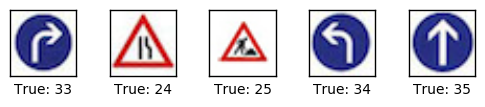

In [13]:
from plot.image_plotter import ImagePlotter
import math

perm = np.arange(data.num_predicting)
np.random.shuffle(perm)
rows = 1
cols = 5
sample_size = rows*cols
ImagePlotter.plot_images(
    images=data.predict_orig[perm[:sample_size]], 
    labels=[np.argmax(label) for label in data.predict_labels[perm[:sample_size]]], 
    rows=rows, columns=cols)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [14]:
from IPython.display import Image, display
from IPython.core.display import HTML 
display(Image(url= "doc/odd_candidate_images.png"))

From left to right.

**1** - This is supposed to be a speed limit sign of 70 km/h but it's extremely hard to identify.

**2** - This is a road work sign, however, it is extremely blurry, very noisy and skewed beyond recognition.

**3** - This is supposed to be a "No passing for vechiles over 3.5 metric tons" sign. I chose this one because you I can see it mistakenly being classified as "No passing" sign if there were several jittered "No passing" images in the network.

**4** - Another example of an image that is almost identical to the first one. It's supposed to be a "keep right" sign but not apparent. 

**5** - This one is cool because it appears to have duct tape or a receipt taped to it going through three key pieces of the image: the red stripe, the white background and the black letters. This will significantly effect the weights compared to other signs, however, the 5 is clearly visible so I have a feeling it will classify accurately.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

Yes! I was able to achieve 100% accuracy for my captured pictures. 

At first, it was 80%. But after adding some padding to one of my images, it predicted well again. The padding seems to be the key here which makes sense because that's what the network was trained to see.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

**SingleLayerLinear#fit** trains the model printing accuracy metrics as it learns and saves the TensorFlow model variables for the best validation accuracy at every iteration. It only saves if it is the first time meeting or exceeding 85% validation accuracy or the latest iteration's validation accuracy is better then the previously saved accuracy model. 

**SingleLayerLinear#predict** takes in the name of a checkpoint, restores it to assign the weights and biases tf.Variables and then measures the accuracy against the images I personally took.

>I am using [tf.train.Saver](https://www.tensorflow.org/versions/r0.11/api_docs/python/state_ops.html#Saver)#save in *#fit* and tf.train.Saver#restore in *#predict* to save and restore my trained model.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.